In [1]:
# Regression Tree & Random Forest

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('marketing_prep.csv', sep=';')

In [4]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-7].values
y = df.iloc[:, 12].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
# Fitting Tree to the Training set (Income)
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_depth=4).fit(X_train[:, 3:4], y_train)
# Методом перебору було вибрано в якості максимальної кіл-сті гілок обрати 4, так за таких умов коефіцієнт детермінації тестової вибірки був найбільшим і модель не є перенавчаною

In [6]:
# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 3:4])

In [7]:
# Coefficient of determination R^2
sdt.score(X_train[:, 3:4], y_train), sdt.score(X_test[:, 3:4], y_test)
# Дана модель показала себе досить добре, в порівнянні з лінійними моделями. Коефіцієнт детерміняції є вищим 0.7 як для навчальної, так і тестової вибірок

(0.7348978768764591, 0.7453656921458982)

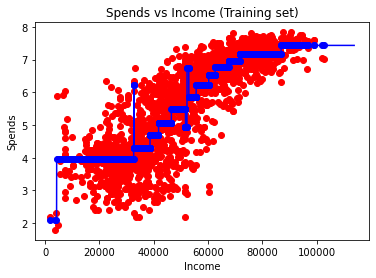

In [8]:
# Visualising the Training set results
X_grid = np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], sdt.predict(X_train[:, 3:4]), 'bo')
plt.title('Spends vs Income (Training set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

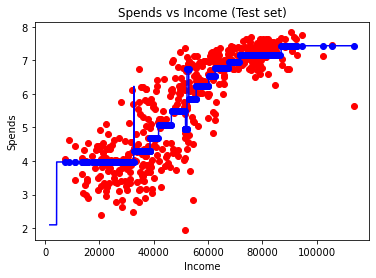

In [9]:
# Visualising the Test set results
X_grid = np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], sdt.predict(X_test[:, 3:4]), 'bo')
plt.title('Spends vs Income (Test set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

In [10]:
# Fitting Tree to the Training set
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
# Методом перебору було вибрано в якості максимальної кіл-сті гілок обрати 5, оскільки за таких умов коефіцієнт детермінації тестової вибірки був найбільшим

In [11]:
# Predicting the Test set results
y_pred = dt.predict(X_test)

In [12]:
# Coefficient of determination R^2
dt.score(X_train, y_train), dt.score(X_test, y_test)
# Коефіцієнти детермінації як для тестової, так і для навчальної вибірок в порівнянні з простою моделлю мають вищі значення

(0.7723771082547757, 0.7507573423375544)

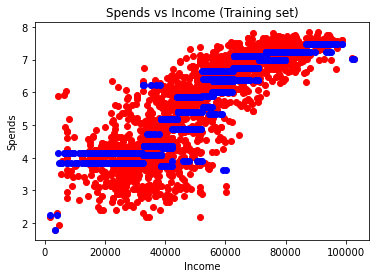

In [13]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], dt.predict(X_train), 'bo')
plt.title('Spends vs Income (Training set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

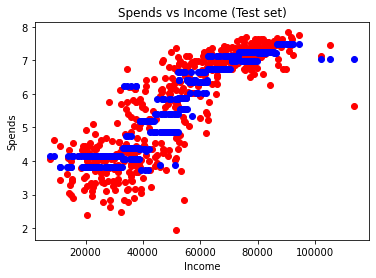

In [14]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], dt.predict(X_test), 'bo')
plt.title('Spends vs Income (Test set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

In [15]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 4, random_state = 0, max_depth=5).fit(X_train, y_train)

In [16]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

In [17]:
# Coefficient of determination R^2
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.7837111154351055, 0.7672303300626109)

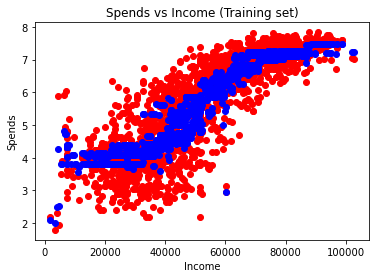

In [18]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], rf.predict(X_train), 'bo')
plt.title('Spends vs Income (Training set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

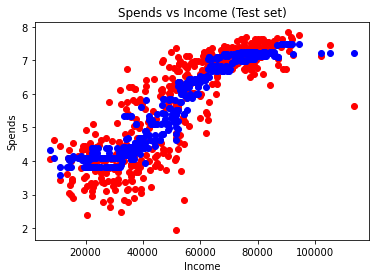

In [19]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], rf.predict(X_test), 'bo')
plt.title('Spends vs Income (Test set)')
plt.xlabel('Income')
plt.ylabel('Spends')
plt.show()

Найкращою виявилась модель випадкового лісу. З усіх моделей (лінійних, дерев рішень, випадкового лісу) вона є найбільш точною, має самі високі значення коефіцієнтів детермінації

In [22]:
# Обчислимо середньоквадратичні помилки для моделі випадкового лісу
from sklearn.metrics import mean_squared_error
mse_rf_train = mean_squared_error(rf.predict(X_train), y_train)
mse_rf_test = mean_squared_error(rf.predict(X_test), y_test)

print("Random forest")
print(mse_rf_train, mse_rf_test)

Random forest
0.4603978461663018 0.5306006805366204
